# Modelos de regressão 1
Índice <a name="topo"></a>

1. [Análise gráfica](#1)
2. [Modelo de regressão linear simples pelo stats models](#2)
3. [Exploração do objeto que contém os resultados do modelo](#3)
    - [Como predizer novas observações?](#3.1)
    - [Onde o Python guarda os parâmetros?](#3.2)

In [3]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


## 1. Análise gráfica <a name="1"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)
     
Já vimos essa análise gráfica no curso. Uma boa análise descritiva é fundamental para termos um modelo estatístico de sucesso. Abaixo está o código do gráfico que já discutimos na apresentação.

(0.0, 10.5)

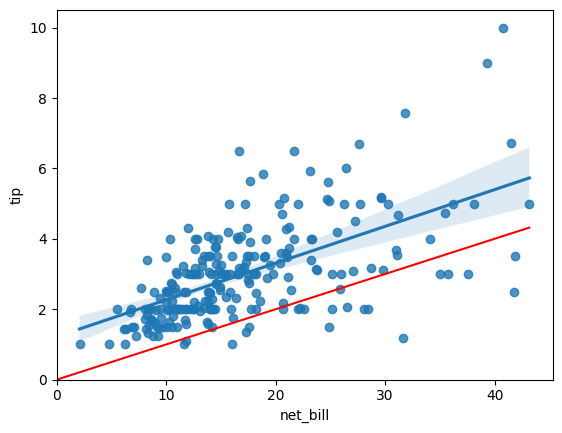

In [3]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

## 2. Modelo de regressão linear simples pelo stats models<a name="2"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)
     
Abaixo, observe a sintaxe que define o modelo de regressão utilizando o API do pacote *formula* do stats models. A sintaxe é até bastante simples, possui semelhanças com o *scikitlearn* (o ```.fit()``` no caso), e caso você conheça o software *R*, a parte ```'tip ~ net_bill'``` vai ser familiar pra você.

Com esse pacote *formula* do statsmodels podemos definir a equação do modelo de uma forma flexível e prática. Abaixo, a variável que está à esquerda do ```~``` é a variável resposta, e a variável à direita é a variável explicativa. O statsmodels completa com os modelos da regressão linear, e estima os parâmetros para nós com o comando ```.fit()```. Criamos então o objeto ```reg```, que possui a nossa regressão já "treinada".

Há diversos métodos e atributos nesse objeto, como o método ```reg.summary()``` que nos fornece um output bem completo do modelo de regressão.

In [4]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           5.02e-23
Time:                        09:28:24   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. Exploração do objeto que contém os resultados do modelo<a name="3"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

#### Predição de dados novos<a name="3.1"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

Se quisermos predizer novos dados, precisamos em primeiro lugar que estes dados estejam no mesmo formato que os dados originais. Abaixo vamos utilizar as 5 primeiras linhas do dataframe ```tips```, simulando a situação em que fossem novos dados que precisam ser preditos.

Em seguida, de forma similar ao *scikitlearn*, podemos predizer esses dados com o método ```.predict()```.

Este objeto ```reg``` que criamos, possui uma diversidade de métodos e atributos, como o atributo ```.params```, que guarda os parâmetros principais do modelo.

In [6]:
dados_novos = tips[0:5]
dados_novos

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [7]:
# Predição de dados novos
reg.predict(dados_novos)

0    2.918050
1    2.192915
2    3.070031
3    3.354125
4    3.414719
dtype: float64

In [ ]:
type(reg)

#### Onde o Python guarda os parâmetros?<a name="3.2"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

O objeto que criamos e armazenamos na variável ```reg``` do Python é um objeto do tipo ```RegressionResultsWrapper``` do *statsmodels*. Esse objeto vem com uma diversidade de métodos e atributos que armazenam os resultados do modelo e podem ser acessados de forma prática. Digite: ```reg.``` e pressione a tecla **TAB** para explorar um pouco as possibilidades.

In [8]:
# Onde o Python guarda os parâmetros?
reg.params

Intercept    1.330698
net_bill     0.099334
dtype: float64

# Análise de resíduos
Índice <a name="topo"></a>

1. [Padrão esperado de resíduos](#1)
2. [Padrão côncavo](#2)
3. [Padrão convexo](#3)
4. [Padrão de variância crescente](#4)
5. [Transformações em x](#5)
6. [Transformação na variável resposta](#6)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

### 1. Padrão esperado de resíduos<a name="1"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

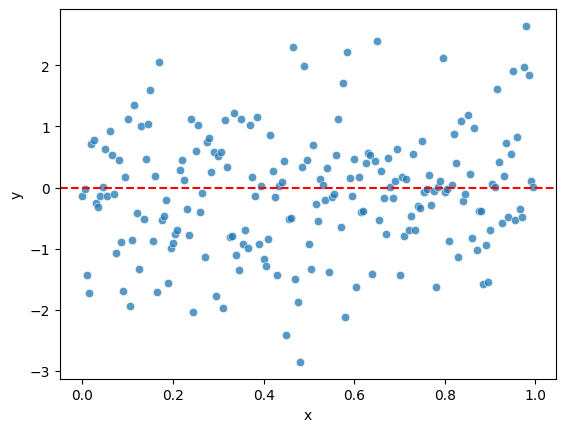

In [5]:
df = pd.DataFrame({'y':np.random.randn(200), 'x':np.arange(0,1,.005)})

sns.scatterplot(x = 'x', y = 'y', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. Padrão côncavo<a name="2"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

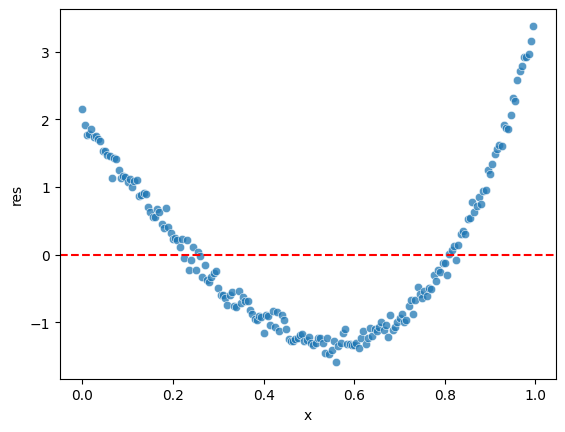

In [6]:
df['y'] = np.exp(2.5*(df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.1
df['y'] = df['y'] - df['y'].mean()

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot: xlabel='x', ylabel='y'>

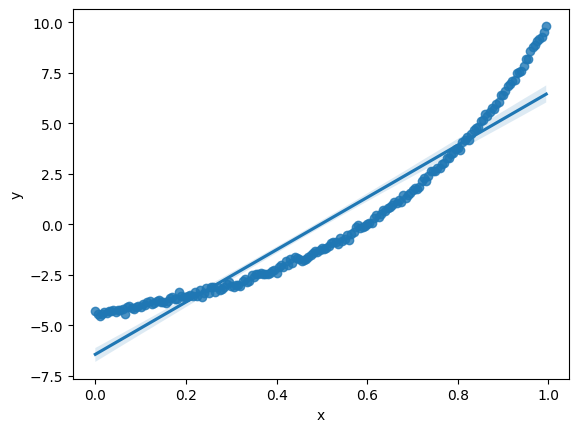

In [7]:
sns.regplot(x = 'x', y = 'y', data = df)

### 3. Padrão convexo<a name="3"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

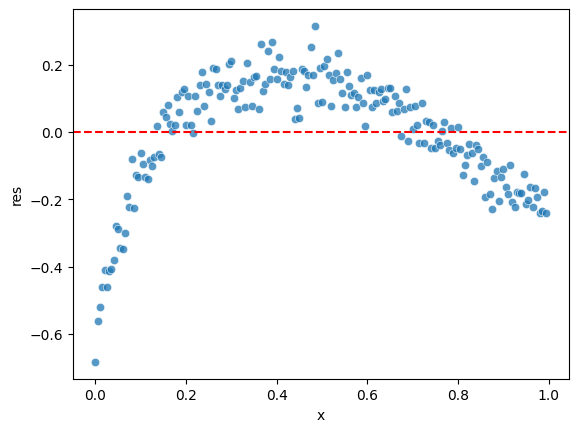

In [8]:
df['y'] = np.log((df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.05
df['y'] = df['y'] - df['y'].mean()

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')



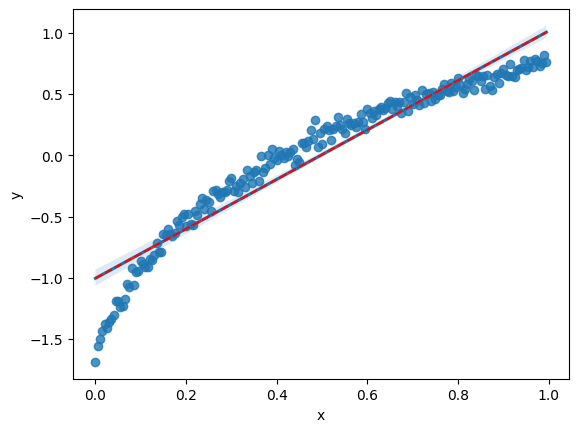

In [9]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

### 4. Padrão de variância crescente<a name="4"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

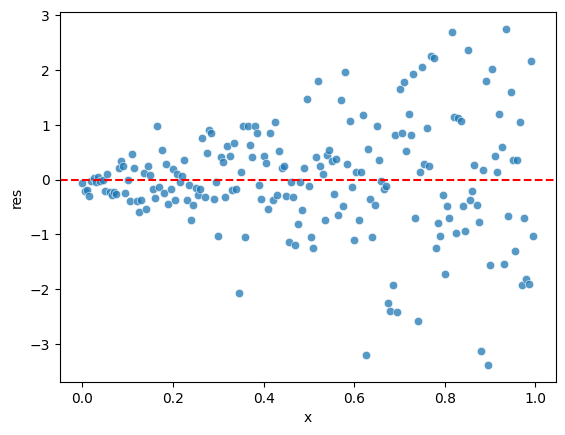

In [10]:
df['y'] = 5*(df['x']-(df['x'].min()-.1)) + (df['x']-(df['x'].min()-.1))*np.random.randn(200)*1.5

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot: xlabel='x', ylabel='y'>

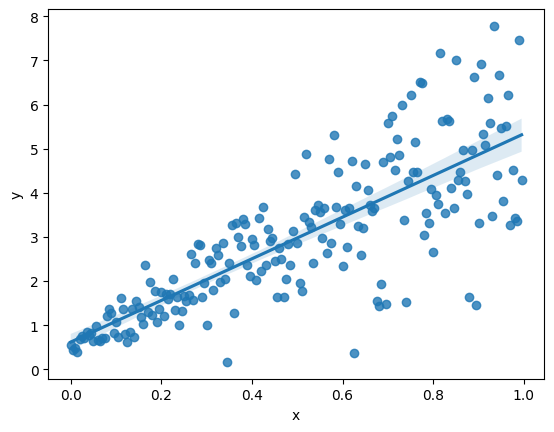

In [11]:
sns.regplot(x = 'x', y = 'y', data = df)

### 5. Transformações em x<a name="5"></a>
<div style="text-align: right"
     
[Voltar ao índice](#topo)</div>
    
Uma forma de buscar um melhor ajuste em uma regressão com padrão de relação não linear entre x e y é buscar uma função g(x) que linearize essa relação. Dentre as opções, podemos tentar:
- categorizar x
- ajustar um polinômio
- transformar por uma função log, exponencial, raiz etc.

<AxesSubplot: xlabel='x', ylabel='y'>

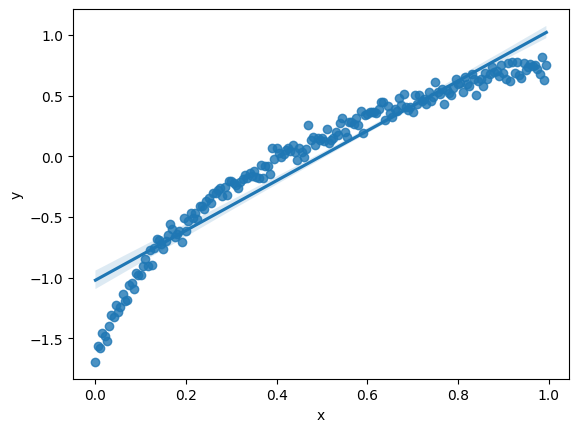

In [12]:
df['y'] = np.log((df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.05
df['y'] = df['y'] - df['y'].mean()
sns.regplot(x = 'x', y = 'y', data = df)

A regressão com a variável ```x``` "crua" resulta em padrâo convexo nos resíduos

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     2109.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          1.60e-107
Time:                        11:15:57   Log-Likelihood:                 57.560
No. Observations:                 200   AIC:                            -111.1
Df Residuals:                     198   BIC:                            -104.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0206      0.026    -39.719      0.0

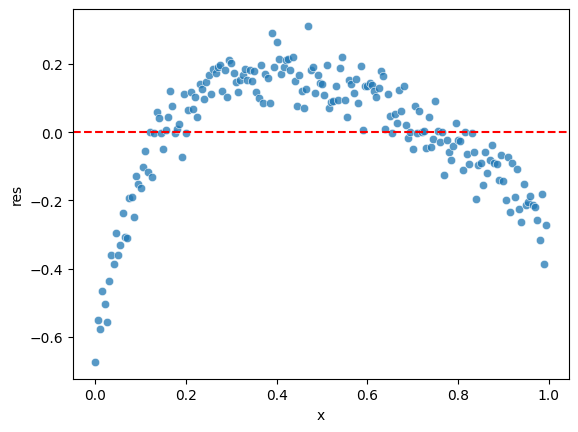

In [14]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


#### Ajustando um polinômio de segundo grau

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5369.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          1.51e-172
Time:                        11:16:01   Log-Likelihood:                 213.69
No. Observations:                 200   AIC:                            -421.4
Df Residuals:                     197   BIC:                            -411.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3759      0.018    -78.

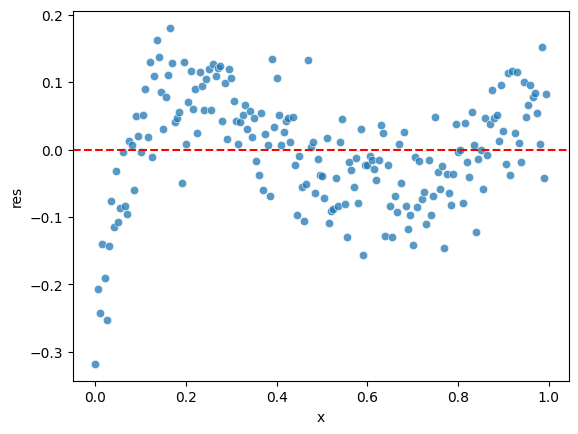

In [15]:
reg = smf.ols('y ~ x + np.power(x,2)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

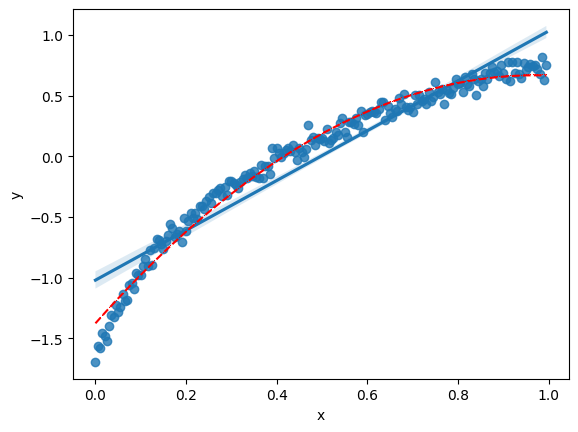

In [16]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Ajustando uma função exponencial

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1035.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.48e-80
Time:                        11:16:46   Log-Likelihood:                -5.1167
No. Observations:                 200   AIC:                             14.23
Df Residuals:                     198   BIC:                             20.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9819      0.064    -30.922      0.0

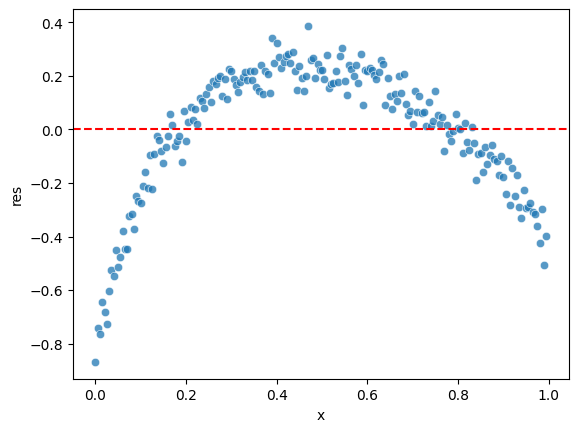

In [17]:
reg = smf.ols('y ~ np.exp(x)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

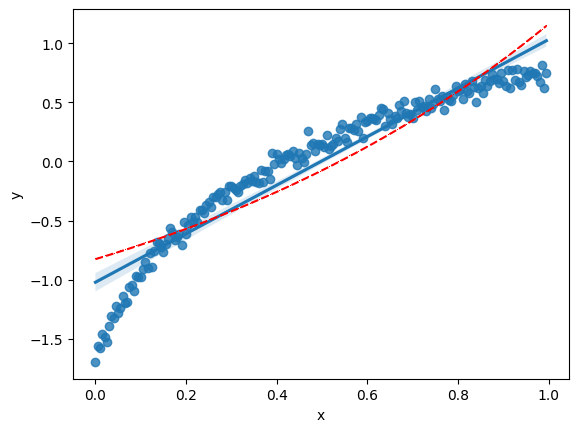

In [18]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Ajustando uma função logaritmica

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.859e+04
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          4.64e-216
Time:                        11:17:02   Log-Likelihood:                 309.96
No. Observations:                 200   AIC:                            -615.9
Df Residuals:                     198   BIC:                            -609.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6782      0.005    125.

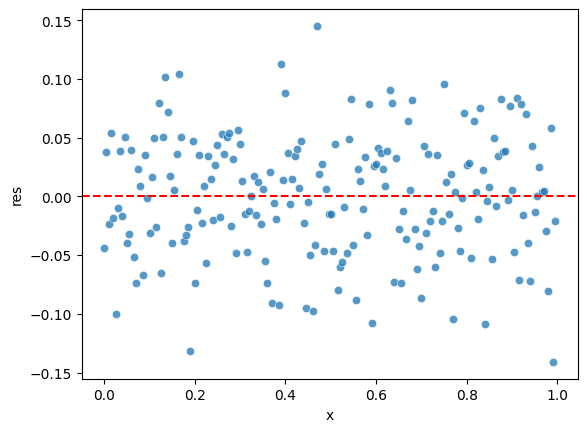

In [19]:
reg = smf.ols('y ~ np.log(x+.1)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

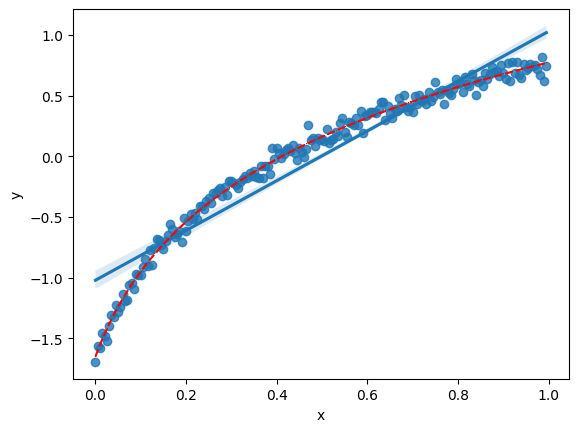

In [20]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

### 6. Transformação na variável resposta<a name="6"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

<AxesSubplot: xlabel='x', ylabel='y'>

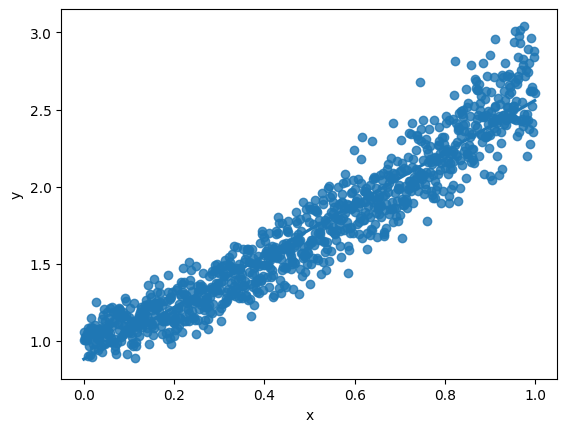

In [21]:
x = np.arange(0,1,.001)
df = pd.DataFrame({'y':np.exp(x + np.random.randn(1000)*.08), 'x':x})

sns.regplot(x = 'x', y = 'y', data = df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.002e+04
Date:                Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:17:26   Log-Likelihood:                 459.50
No. Observations:                1000   AIC:                            -915.0
Df Residuals:                     998   BIC:                            -905.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8823      0.010     91.262      0.0

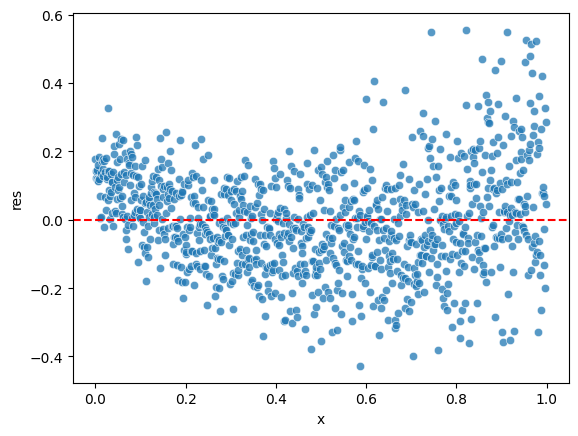

In [22]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [23]:
# outra forma de calcular o R^2
df['pred'] = reg.fittedvalues

r = df[['pred', 'y']].corr().iloc[0,1]

In [24]:
r**2

0.9094028922949939

#### Log na variável resposta usando o Patsy

                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.280e+04
Date:                Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:17:51   Log-Likelihood:                 1106.5
No. Observations:                1000   AIC:                            -2209.
Df Residuals:                     998   BIC:                            -2199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0026      0.005      0.518      0.6

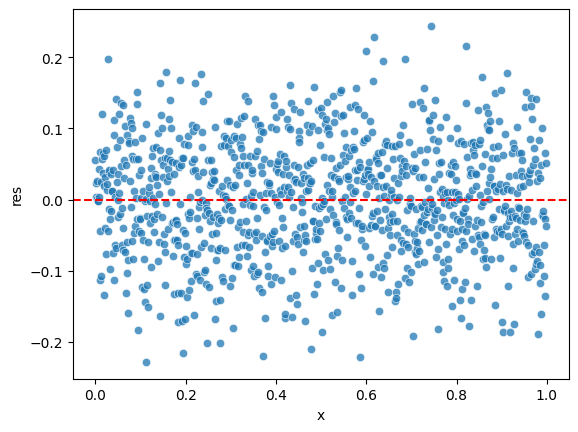

In [25]:
reg = smf.ols('np.log(y) ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

#### Por que não posso comparar o R^2 desse modelo com o primeiro?

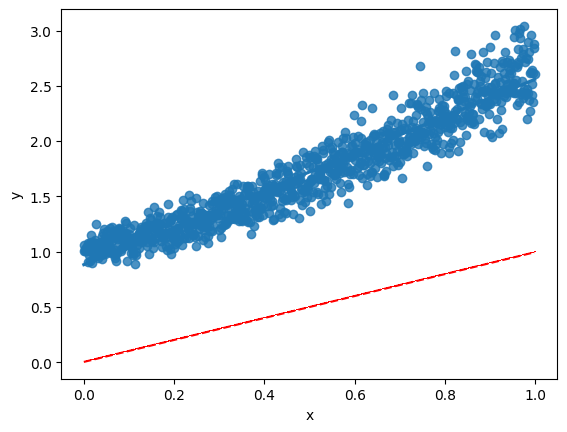

In [26]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Então como eu calculo o R^2 no dado original?

In [27]:
df['pred_y'] = np.exp(reg.fittedvalues)

df[['pred_y', 'y']].corr().iloc[0,1]**2

0.921899225896022

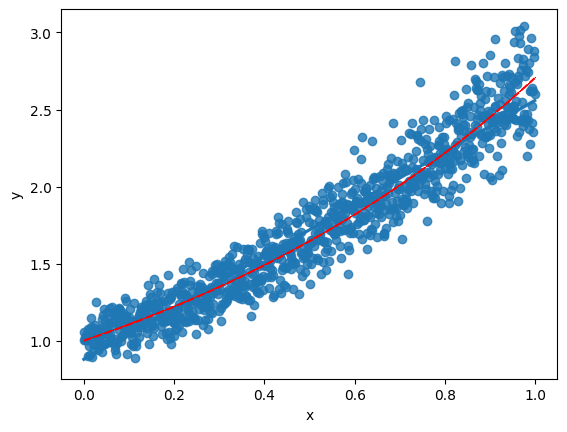

In [28]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], df['pred_y'], 'r,--')

# Introdução ao statsmodels

Objetivos:
- Introduzir o Patsy (especificação de modelo similar ao R)
- Introduzir modelagem com o Statsmodels

## Índice <a name="topo"></a>

1. [Introdução ao Patsy](#1)
    1. [Definindo a matriz de modelagem no Patsy](#1.1)
    2. [Retirando o intercepto](#1.2)
    3. [Transformações de dados no Patsy](#1.3)
    4. [Aplicando patsy a dados novos](#1.4)
5. [Introdução ao statsmodels](#2)
    1. [Usando o API base do statsmodels](#2.1)
    2. [Usando o API *formula* do statsmodels](#2.2)

In [24]:
import pandas as pd
import numpy as np
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [25]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


## <span style="color:blue">1. Introdução ao Patsy</span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

O Patsy é um pacote que permite especificar uma matriz de modelagem de uma forma prática como no R, com a seguinte sintaxe:
```
'y ~ x1 + x2 + x3'
```

Ele possui diversos recursos como:
- inclui intercepto (ou exclui utilizando +0)
- inserir funções das variáveis de forma prática
- trabalhar com dados categorizados
- facilita a aplicação a novos dados

### <span style="color:blue">1.1 Definindo a matriz de modelagem com Patsy</span><a name="1.1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div> 

In [26]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + total_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  size  total_bill
          1              1             1     2       16.99
          1              0             1     3       10.34
          1              0             1     3       21.01
          1              0             1     2       23.68
          1              1             1     4       24.59
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

In [27]:
y

DesignMatrix with shape (5, 1)
  tip_pct
  0.06320
  0.19124
  0.19989
  0.16249
  0.17207
  Terms:
    'tip_pct' (column 0)

### <span style="color:blue">1.2 Retirando o intercepto</span><a name="1.2"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>  

Podemos retirar o intercepto no Patsy simplesmente com a instrução ```+0```. Ou, alternativamente, podemos colocá-lo de forma explícita com ```+1```.

In [28]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + total_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  size  total_bill
          0            1             1     2       16.99
          1            0             1     3       10.34
          1            0             1     3       21.01
          1            0             1     2       23.68
          0            1             1     4       24.59
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

### <span style="color:blue">1.3 Transformações de dados no Patsy</span><a name="1.3"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>  

#### Aplicando funções

Podemos aplicar funções vetorizadas no Patsy de forma transparente, dentro do string. Em especial, a maioria das funções do Numpy são vetorizadas e podem ser usadas normalmente, como o ```np.log()``` e ```np.exp()``` que fazem logaritmo e função exponencial ($e^x$) respectivamente.

In [29]:
y, X = patsy.dmatrices('tip_pct ~ np.log(size) + standardize(total_bill) + center(tip)', tips[:5])
X


DesignMatrix with shape (5, 4)
  Intercept  np.log(size)  standardize(total_bill)  center(tip)
          1       0.69315                 -0.44762       -1.608
          1       1.09861                 -1.72407       -0.958
          1       1.09861                  0.32401        0.882
          1       0.69315                  0.83651        0.692
          1       1.38629                  1.01118        0.992
  Terms:
    'Intercept' (column 0)
    'np.log(size)' (column 1)
    'standardize(total_bill)' (column 2)
    'center(tip)' (column 3)

In [30]:

y, X = patsy.dmatrices('tip ~ sex + smoker + standardize(size) + center(total_bill)  + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  standardize(size)  center(total_bill)
          0            1             1           -1.06904              -2.332
          1            0             1            0.26726              -8.982
          1            0             1            0.26726               1.688
          1            0             1           -1.06904               4.358
          0            1             1            1.60357               5.268
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'standardize(size)' (column 3)
    'center(total_bill)' (column 4)

#### Somando variáveis dentro do Patsy

Como o caractere ```+``` é interpretado dentro do contexto da construção da matriz de modelagem, se quisermos somar variáveis no Patsy podemos usar a função ```I()``` como abaixo. 



In [31]:
y, X = patsy.dmatrices('tip ~ I(size + total_bill) + size + total_bill', tips[:5])
X

DesignMatrix with shape (5, 4)
  Intercept  I(size + total_bill)  size  total_bill
          1                 18.99     2       16.99
          1                 13.34     3       10.34
          1                 24.01     3       21.01
          1                 25.68     2       23.68
          1                 28.59     4       24.59
  Terms:
    'Intercept' (column 0)
    'I(size + total_bill)' (column 1)
    'size' (column 2)
    'total_bill' (column 3)

#### Dados categorizados no Patsy

Já vimos que o Patsy calcula as variáveis dummy para variáveis tipo **str**. Mas se quisermos tratar uma variável numérica como categorizada temos que usar a função ```C()```.



In [32]:
y, X = patsy.dmatrices('tip ~ sex  + C(size) + total_bill', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  C(size)[T.3]  C(size)[T.4]  total_bill
          1              1             0             0       16.99
          1              0             1             0       10.34
          1              0             1             0       21.01
          1              0             0             0       23.68
          1              1             0             1       24.59
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'C(size)' (columns 2:4)
    'total_bill' (column 4)

#### Definindo interações com Patsy
Podemos inserir interações no Patsy da mesma forma que em boa parte dos softwares estatísticos programáveis com a sintaxe ```var1*var2```.


In [33]:
y, X = patsy.dmatrices('tip ~ sex  + time + sex*time', tips[:5])
X

DesignMatrix with shape (5, 4)
  Intercept  sex[T.Female]  time[T.Dinner]  sex[T.Female]:time[T.Dinner]
          1              1               1                             1
          1              0               1                             0
          1              0               1                             0
          1              0               1                             0
          1              1               1                             1
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'time' (column 2)
    'sex:time' (column 3)

In [34]:
y, X = patsy.dmatrices('tip ~ sex:time + 0', tips[:5])
X

DesignMatrix with shape (5, 4)
  Columns:
    ['sex[Male]:time[Lunch]',
     'sex[Female]:time[Lunch]',
     'sex[Male]:time[Dinner]',
     'sex[Female]:time[Dinner]']
  Terms:
    'sex:time' (columns 0:4)
  (to view full data, use np.asarray(this_obj))

### <span style="color:blue">1.4 Aplicando patsy a dados novos</span><a name="1.4"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>  

Como vimos, a função ```patsy.dmatrices()``` constroi a matriz de modelagem de acordo com as instruções do string que é passado como parâmetro. Com bastante frequência, vamos precisar aplicar o nosso modelo a dados novos, vamos portanto, precisar construir a mesma matriz de dados para esses dados novos. 

A função ```patsy.build_design_matrices()``` cumpre com essa tarefa de construir a matriz de modelagem para novos dados, de modo a facilitar bastante a implantação do modelo.

In [35]:
novos_Dados = tips[20:30]

new_X = patsy.build_design_matrices([X.design_info], novos_Dados)
new_X

[DesignMatrix with shape (10, 4)
   Columns:
     ['sex[Male]:time[Lunch]',
      'sex[Female]:time[Lunch]',
      'sex[Male]:time[Dinner]',
      'sex[Female]:time[Dinner]']
   Terms:
     'sex:time' (columns 0:4)
   (to view full data, use np.asarray(this_obj))]

## <span style="color:blue">2 Introdução ao Statsmodels</span><a name="2"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>  


### <span style="color:blue">2.1 Usando a api do statsmodels</span><a name="2.1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>  

O statsmodels tem o API padrão, que é compatível com o Patsy, ou seja, você pode inserir a matriz de modelagem fornecida pelo ```patsy.dmatrices()```, bem como um objeto do numpy ou do pandas, como fizemos com o scikitlearn.

In [36]:
y, X = patsy.dmatrices('tip ~ sex  + time + smoker + day', tips)
X

DesignMatrix with shape (244, 7)
  Columns:
    ['Intercept',
     'sex[T.Female]',
     'time[T.Dinner]',
     'smoker[T.No]',
     'day[T.Fri]',
     'day[T.Sat]',
     'day[T.Sun]']
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'time' (column 2)
    'smoker' (column 3)
    'day' (columns 4:7)
  (to view full data, use np.asarray(this_obj))

In [37]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.117
Date:                Sun, 29 Jan 2023   Prob (F-statistic):              0.353
Time:                        12:59:05   Log-Likelihood:                -421.55
No. Observations:                 244   AIC:                             857.1
Df Residuals:                     237   BIC:                             881.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.9124      0.244     11.941      0.000       2.432       3.393
sex[T.Female]     -0.1702      0.190     -0.896      0.371      -0.544       0.204
time[T.Dinner]     0.5034      0.595      0.846      0.398      -0.669       1.675
smoker[T.No]      -0.0843      0.193     -0.437      0.662      -0.464       0.296
day[T.Fri]        -0.3972      0.528     -0.753      0.452      -1.437       0.642
day[T.Sat]        -0.3243      0.632     -0.513      0.609      -1.570       0.921
day[T.Sun]        -0.0571      0.633     -0.090      0.928      -1.304       1.189
==============================================================================
Omnibus:                       80.856   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.887
Skew:                           1.466   Prob(JB):                     5.40e-50
Kurtosis:                       6.703   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color:blue">2.2 Usando a api *formula* do statsmodels</span><a name="2.2"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>  

O statsmodels possui um pacote *formula*, que já integra a interface do Patsy. Com ele podemos indicar a sintaxe do modelo diretamente na função do modelo, ```ols()``` no caso. Repare que a função vem com letras minúsculas, em contraste com o API padrão do statsmodels, propositalmente, para deixar claro qual o API que está sendo utilizado.

In [38]:
results = smf.ols('''
                    tip_pct ~ sex 
                                + size 
                                + np.log(total_bill)
                  ''', tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     7.953
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           4.46e-05
Time:                        12:59:05   Log-Likelihood:                 107.89
No. Observations:                 244   AIC:                            -207.8
Df Residuals:                     240   BIC:                            -193.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5401      0.071      7.618      0.000       0.400       0.680
sex[T.Female]         -0.0105      0.021     -0.496      0.620      -0.052       0.031
size                   0.0176      0.013      1.345      0.180      -0.008       0.043
np.log(total_bill)    -0.1313      0.029     -4.589      0.000      -0.188      -0.075
==============================================================================
Omnibus:                      460.749   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           214315.295
Skew:                          10.735   Prob(JB):                         0.00
Kurtosis:                     146.594   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Introdução ao statsmodels

Objetivos:
- Entender o uso da regressão linear múltipla
- Aprender sobre a análise de resíduos na regressão linear múltipla

## Índice <a name="topo"></a>

1. [Regressão múltipla](#1)
2. [Análise de resíduos](#2)
3. [Análise dos valores preditos](#3)

In [39]:
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [40]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


## <span style="color:blue">1. Regressão múltipla </span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

In [41]:
reg = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data = tips).fit()

In [42]:
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.31
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           8.67e-21
Time:                        12:59:06   Log-Likelihood:                -88.627
No. Observations:                 244   AIC:                             191.3
Df Residuals:                     237   BIC:                             215.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3111      0.202     -1.543      0.124      -0.708       0.086
C(size)[T.2]         0.2169      0.187      1.161      0.247      -0.151       0.585
C(size)[T.3]         0.3430      0.200      1.712      0.088      -0.052       0.738
C(size)[T.4]         0.4559      0.206      2.210      0.028       0.049       0.862
C(size)[T.5]         0.4122      0.255      1.618      0.107      -0.090       0.914
C(size)[T.6]         0.6721      0.270      2.493      0.013       0.141       1.203
np.log(net_bill)     0.3810      0.059      6.420      0.000       0.264       0.498
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.912
Skew:                           0.108   Prob(JB):                       0.0116
Kurtosis:                       3.911   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style="color:blue">2. Análise de resíduos</span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

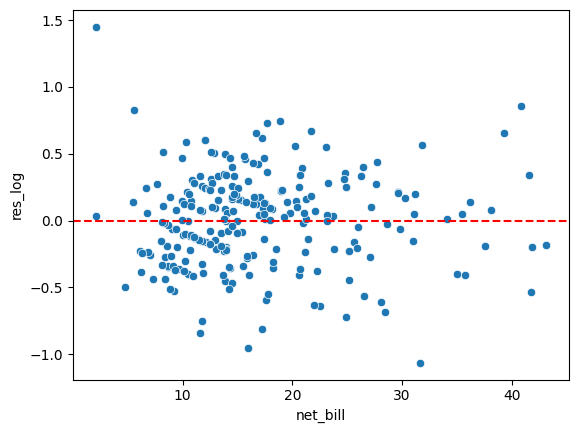

In [43]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot: xlabel='sex', ylabel='res_log'>

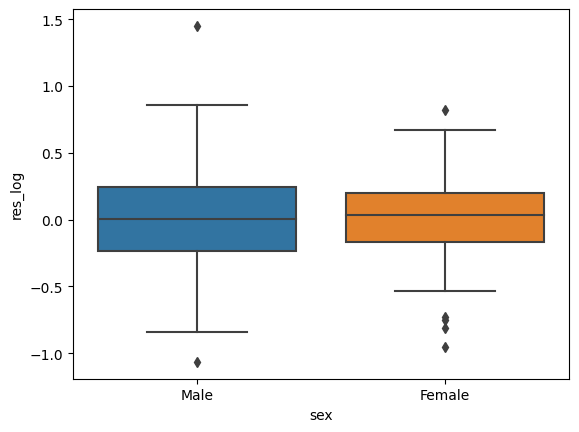

In [44]:
sns.boxplot(x = 'sex', y = 'res_log', data = tips)

<AxesSubplot: xlabel='smoker', ylabel='res_log'>

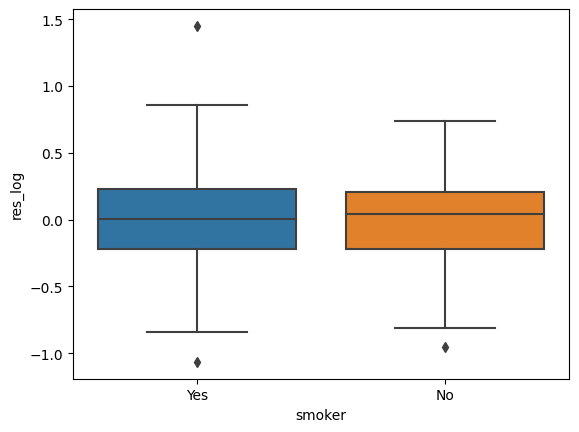

In [45]:
sns.boxplot(x = 'smoker', y = 'res_log', data = tips)

<AxesSubplot: xlabel='day', ylabel='res_log'>

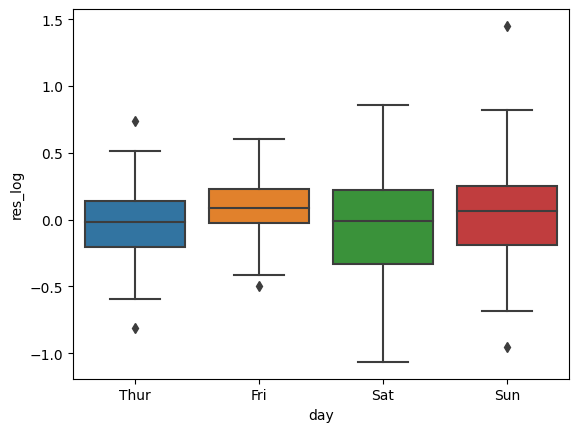

In [46]:
sns.boxplot(x = 'day', y = 'res_log', data = tips)

<AxesSubplot: xlabel='size', ylabel='res_log'>

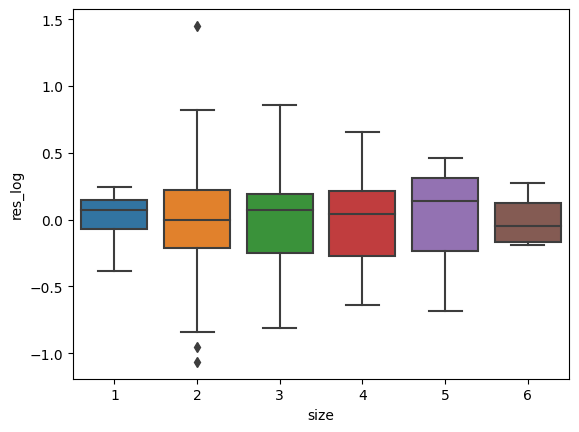

In [47]:
sns.boxplot(x = 'size', y = 'res_log', data = tips)

## <span style="color:blue">3. Análise dos valores preditos</span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

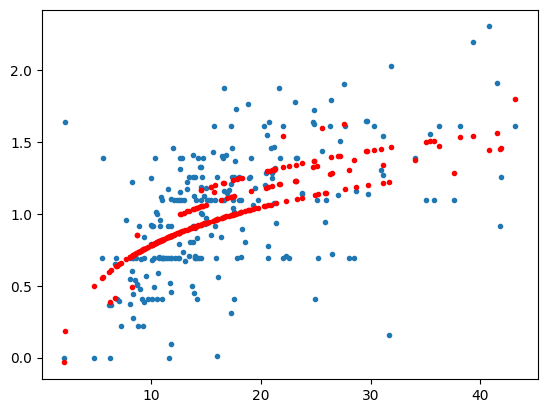

In [48]:
tips['pred_log'] = reg.fittedvalues

plt.plot(tips['net_bill'], np.log(tips['tip']), '.')
plt.plot(tips['net_bill'], tips['pred_log'], 'r.')

In [49]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


## <span style="color:blue">1. Regressão múltipla </span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

In [50]:
reg = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data = tips).fit()

In [51]:
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.31
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           8.67e-21
Time:                        12:59:12   Log-Likelihood:                -88.627
No. Observations:                 244   AIC:                             191.3
Df Residuals:                     237   BIC:                             215.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3111      0.202     -1.543      0.124      -0.708       0.086
C(size)[T.2]         0.2169      0.187      1.161      0.247      -0.151       0.585
C(size)[T.3]         0.3430      0.200      1.712      0.088      -0.052       0.738
C(size)[T.4]         0.4559      0.206      2.210      0.028       0.049       0.862
C(size)[T.5]         0.4122      0.255      1.618      0.107      -0.090       0.914
C(size)[T.6]         0.6721      0.270      2.493      0.013       0.141       1.203
np.log(net_bill)     0.3810      0.059      6.420      0.000       0.264       0.498
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.912
Skew:                           0.108   Prob(JB):                       0.0116
Kurtosis:                       3.911   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style="color:blue">2. Análise de resíduos</span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

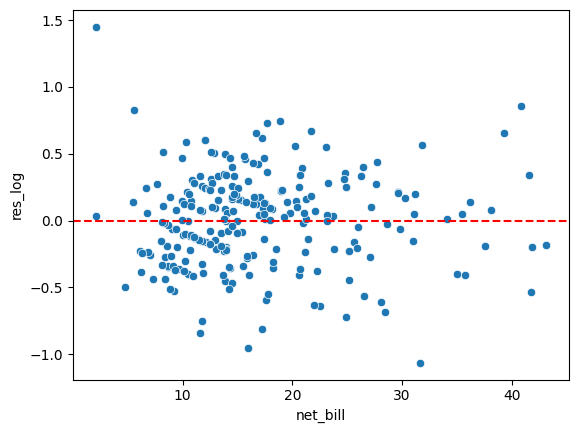

In [52]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot: xlabel='sex', ylabel='res_log'>

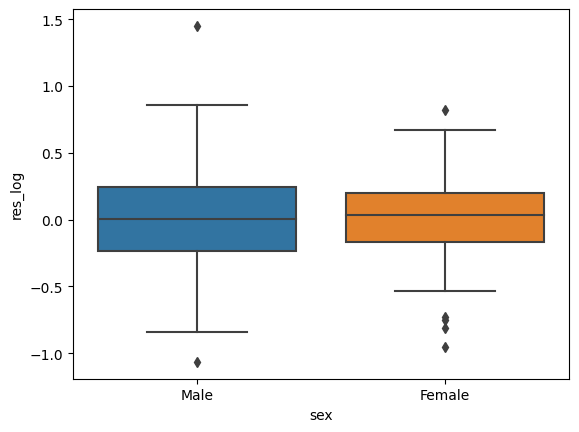

In [53]:
sns.boxplot(x = 'sex', y = 'res_log', data = tips)

<AxesSubplot: xlabel='smoker', ylabel='res_log'>

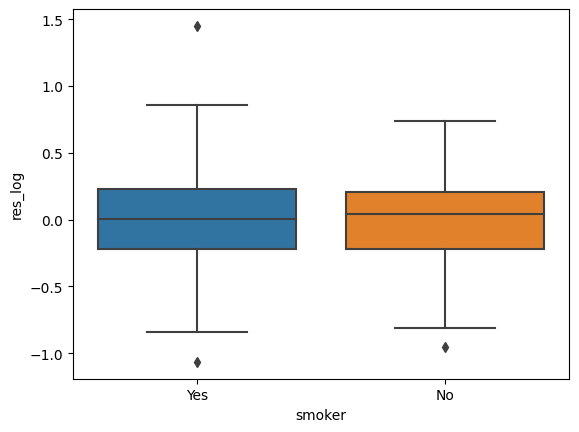

In [54]:
sns.boxplot(x = 'smoker', y = 'res_log', data = tips)

<AxesSubplot: xlabel='day', ylabel='res_log'>

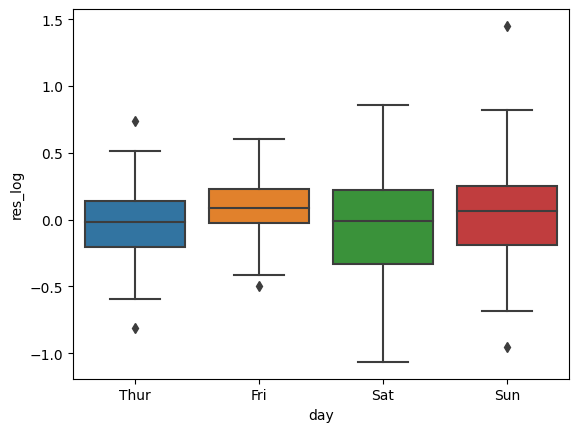

In [55]:
sns.boxplot(x = 'day', y = 'res_log', data = tips)

<AxesSubplot: xlabel='size', ylabel='res_log'>

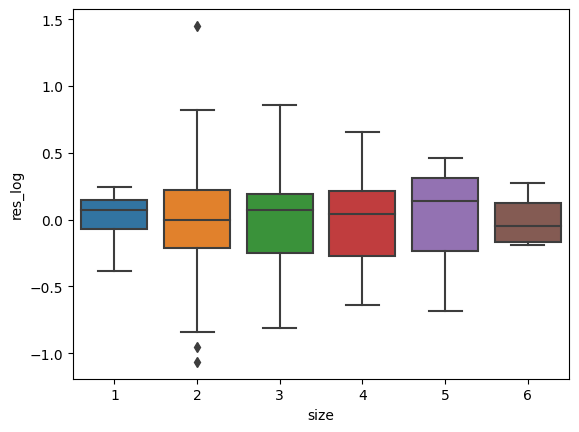

In [56]:
sns.boxplot(x = 'size', y = 'res_log', data = tips)

## <span style="color:blue">3. Análise dos valores preditos</span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

In [57]:
tips['pred_log'] = reg.fittedvalues

plt.plot(tips['net_bill'], tips['tip_log'], '.')
plt.plot(tips['net_bill'], tips['pred_log'], 'r.')

KeyError: 'tip_log'